<a href="https://colab.research.google.com/github/abhinav223/BeginnerPython/blob/master/Copy_of_TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [0]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
8.350230318000058
GPU (s):
0.1842791589999706
GPU speedup over CPU: 45x


# New Section

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


#print(tf.__version__)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape
len(train_labels)

60000

In [0]:
train_labels
len(test_labels)

10000

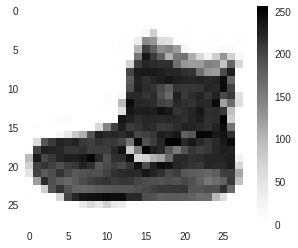

In [0]:
plt.figure(figsize=(5,4))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0
class_names=['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

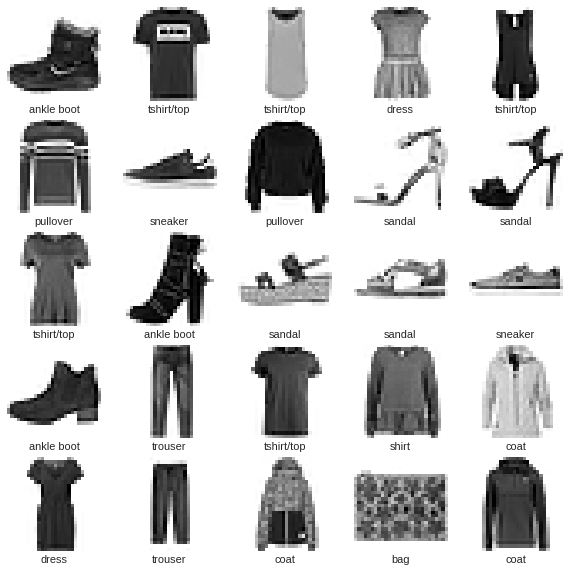

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])


In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3068 - acc: 0.8901
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3050 - acc: 0.8912
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3039 - acc: 0.8916
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3023 - acc: 0.8920
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3004 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2996 - acc: 0.8931
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2983 - acc: 0.8936
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2967 - acc: 0.8931
Epoch 9/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2953 - acc: 0.8944
Epoch 10/10
60000/60000 [==============================] - 5s 89us/sample - loss: 

In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test Accuracy',test_acc)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3632 - acc: 0.8721
Test Accuracy 0.8721


In [0]:
predictions=model.predict(test_images)
predictions[0]

array([2.0235801e-08, 9.4570060e-11, 8.5004569e-07, 1.4895850e-06,
       1.9320867e-06, 3.7988894e-02, 2.7568349e-05, 1.6016548e-02,
       1.1622836e-03, 9.4480032e-01], dtype=float32)

In [0]:
predictions[1234]


array([4.8572721e-04, 3.1381281e-04, 2.4148168e-01, 1.0482562e-03,
       7.3313230e-01, 7.5848014e-13, 2.3213904e-02, 3.0923413e-15,
       3.2433399e-04, 4.8798960e-16], dtype=float32)